# ADN_T013. Molecular docking with Smina

Authors:
* Adnane Aouidate, (2019-2020), Computer Aided Drug Discovery Center, Shenzhen Institute of Advanced Technology(SIAT), Shenzhen, China.
* Adnane Aouidate, (2021-2022), Structural Bioinformatics and Chemoinformatics, Institute of Organic and Analytical Chemistry (ICOA), Orléans, France.
* Update , 2023, Ait Melloul Faculty of Applied Sciences, Ibn Zohr University, Agadir, Morocco,

#### Requirements:

Smina : https://sourceforge.net/projects/smina/

Installation via Anaconda : conda install -c conda-forge smina

Open babel : http://openbabel.org/wiki/Main_Page

Installation via anaconda : conda install -c conda-forge openbabel


## Aim of this tutorial

Molecular docking is a way for scientists to understand how small molecules, like drugs, fit into proteins in the body. Proteins are like tiny machines inside our cells that do important jobs, like helping our bodies break down food or fight off infections.
When a small molecule, like a drug, docks with a protein, it can change the protein's shape and how it works. This is important because the shape of a protein can determine whether or not a drug will be effective in treating a disease.
To do molecular docking, scientists use computers to create a model of the protein and the small molecule. Then, they use special software (Like Autodock, rDock, Smina, vina, SurflexDock, and LeDock...) to figure out how the molecule fits into the protein. This helps them understand how the drug will work in the body and if it will be effective.

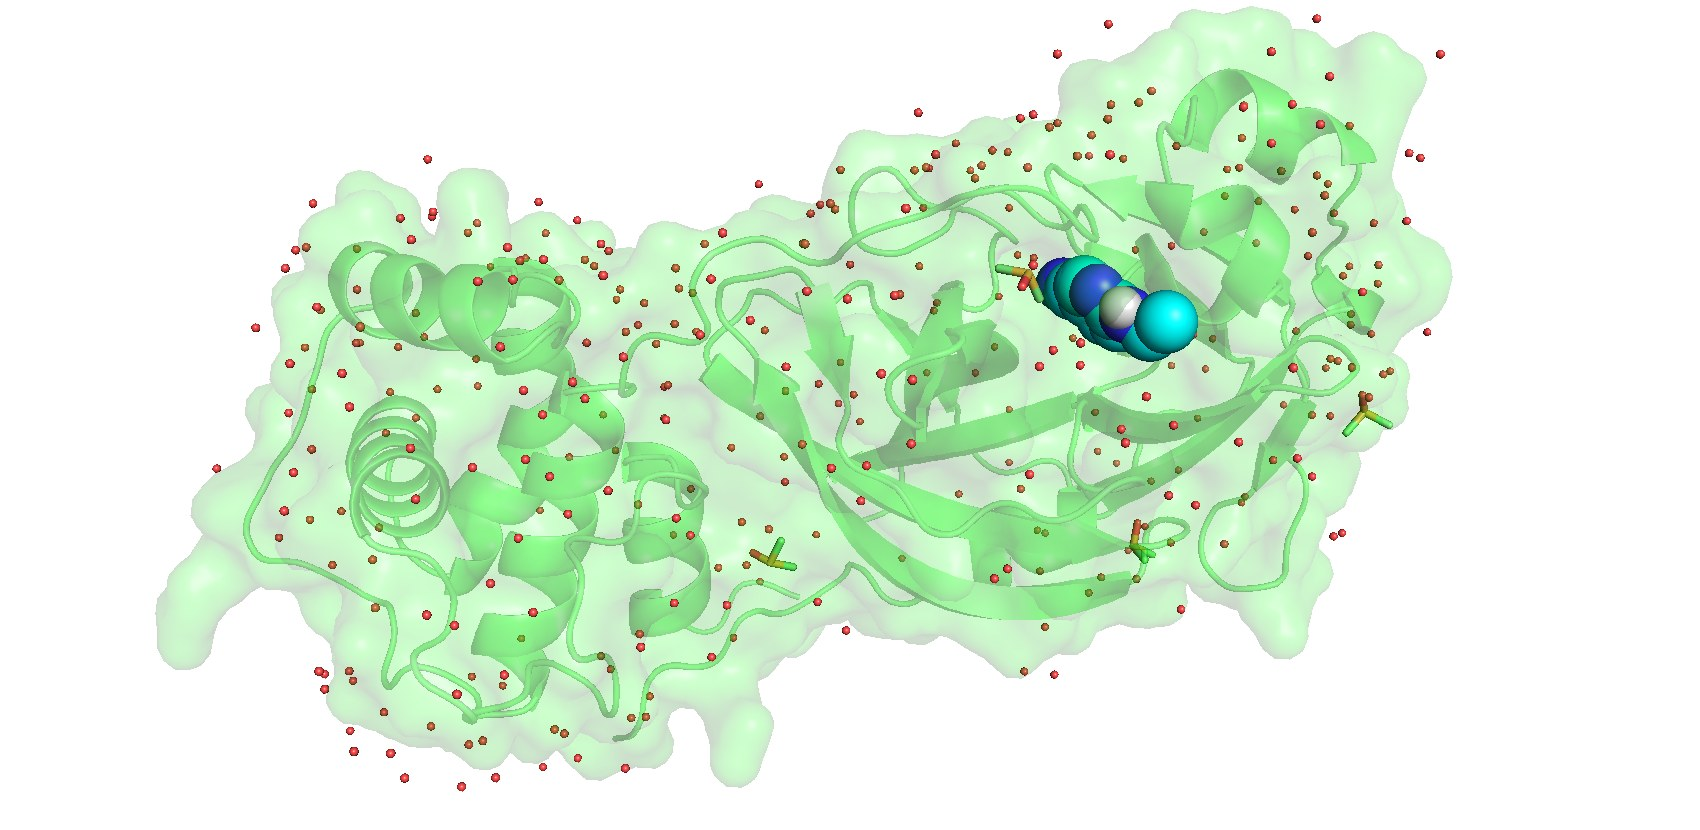!


In this jupyter notebook, I will provide a tutorial for using Smina - a free program for simple molecular docking. Smina is a great tool to work with as it gives you a lot of control over scoring terms and comes with a variety of convenient functions that can be easily accessed from the command line. By using Bash commands, Smina, and open-babel, we can carry out molecular docking in this Jupyter notebook. The best part is that Smina comes with a static version for Linux (smina.osx for Mac), which means it can be easily placed in the command-line path without any dependencies or libraries.

To illustrate the process, we will be using the PDB file 5R82. It is a complex involving the SARS-CoV-2 main protease in conjunction with the inhibitor Z219104216, also recognized as RZS. Protease enzymes tend to play a vital role in viral protein maturation by facilitating the cleavage of proproteins upon their translation into host cell cytosol. As a result, these enzymes frequently represent attractive drug targets. By inhibiting the viral protease, it is possible to reduce the assembly of mature viral particles.

So we will learn how to use smina

Let's get statrted 

We can direcltly get the protein from rcsb website : 
https://www.rcsb.org/structure/5R82



Let's first import the some useful libraries

In [34]:
import os
import py3Dmol
from pathlib import Path

In [35]:
HERE = Path(_dh[-1])
os.chdir(HERE/"PL")

Here, we are using wget command-line to directely download the structure to the "/PL" directory where we want to work:

## Donwload the protein of interest

In [3]:
!wget https://www.rcsb.org/pdb/files/5R82.pdb

--2023-07-11 17:25:24--  https://www.rcsb.org/pdb/files/5R82.pdb
Resolving www.rcsb.org (www.rcsb.org)... 128.6.159.248
Connecting to www.rcsb.org (www.rcsb.org)|128.6.159.248|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.rcsb.org/download/5R82.pdb [following]
--2023-07-11 17:25:25--  https://files.rcsb.org/download/5R82.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.158.49
Connecting to files.rcsb.org (files.rcsb.org)|128.6.158.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘5R82.pdb.1’

5R82.pdb.1              [    <=>             ] 253,36K   267KB/s    in 1,0s    

2023-07-11 17:25:27 (267 KB/s) - ‘5R82.pdb.1’ saved [259443]



## Extract separately the protein atoms and ligand atoms

First we have to extract just the protein atoms, which are lines that start with the keyword ATOM. Each protein chain is terminated with a line that starts with TER. In the terminal type

In [25]:
!grep "^\(ATOM\|TER\)" 5R82.pdb > 5R82_protein.pdb
#The backslashes before the parentheses and vertical bar are necessary to ensure that grep interprets the pattern correctly. 
#The caret (^) indicates that we want to match lines that start with the pattern, and the parentheses and vertical bar create a 
#logical "or" operator to match either "ATOM" or "TER".

First, extract the ligand atoms from the PDB. The ligand residue name for in the PDB file is RZS and the lines start with the keyword HETATM for heteroatoms. In a terminal type :

In [23]:
!grep "^HETATM.*RZS" 5R82.pdb > 5R82_ligand.pdb

Unlike Vina, Smina is able to handle different molecular forrmats as pdb and SDF. It is worthy to note that open-babel can be used to convert from .pdb format into .sdf format. Vina and Smina does not use the same scoring function as Autodock and do not use the charges at all for the default scoring function. Open-babel fast gives us the two needed .pdb and SDF files.


Crystal structures normally lack hydrogen atoms. However, hydrogen atoms, or more specifically polar hydrogen atoms are required for appropriate treatment of electrostatics during docking. That why we need to add hydrogen atom to the structure, in this tutorial we will use Openbabel for this purpose

# Add hydrogens to the protein structure and convert ligand to sdf format

For protein the -p flag is used to add hydrogen at **pH = 7.4**

In [26]:
!obabel 5R82_protein.pdb -O 5R82_proteinH.pdb -p

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is 5R82_protein.pdb)

1 molecule converted


### For ligand

In [27]:
!obabel 5R82_ligand.pdb -O 5R82_ligand.sdf -p

1 molecule converted


Performing docking with Smina is a hassle-free task that can be scripted thanks to its unique feature. Smina facilitates the generation of a docking box from an existing ligand, and this can be easily executed from the command line. You can use the -autobox_ligand and -autobox_add switches to define the docking box. The box size is set to be 6 Å greater than the specified ligand. Moreover, by using the -exhaustiveness switch with a value of 16, Smina can be directed to spend more time searching for the ligand's optimal binding mode within the binding site. The default value for this switch is 8.

## Perfom molecular docking

In [30]:
!smina -r 5R82_proteinH.pdb -l 5R82_ligand.sdf --autobox_ligand 5R82_ligand.sdf --autobox_add 6 --exhaustiveness 16 -o 5R82-redock.sdf

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1.923        num_tors_div

Using random seed: -1419690609

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------

## Visulize the results 

We didn't get perfect results, however this is just a small tuto to learn how to use Smina, open babel and Py3Dmol

In [37]:
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

#Add the protein strucutre
view.addModel(open('5R82_proteinH.pdb','r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})

#Add original ligand conformation
view.addModel(open('5R82_ligand.sdf','r').read(),format='sdf')
ref_m = view.getModel()

ref_m.setStyle({},{'stick':{'colorscheme':'redCarbon','radius':0.2}})
#Add docked conformation
view.addModel(open('5R82-redock.sdf','r').read(),format='sdf')
ref_m = view.getModel()
ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

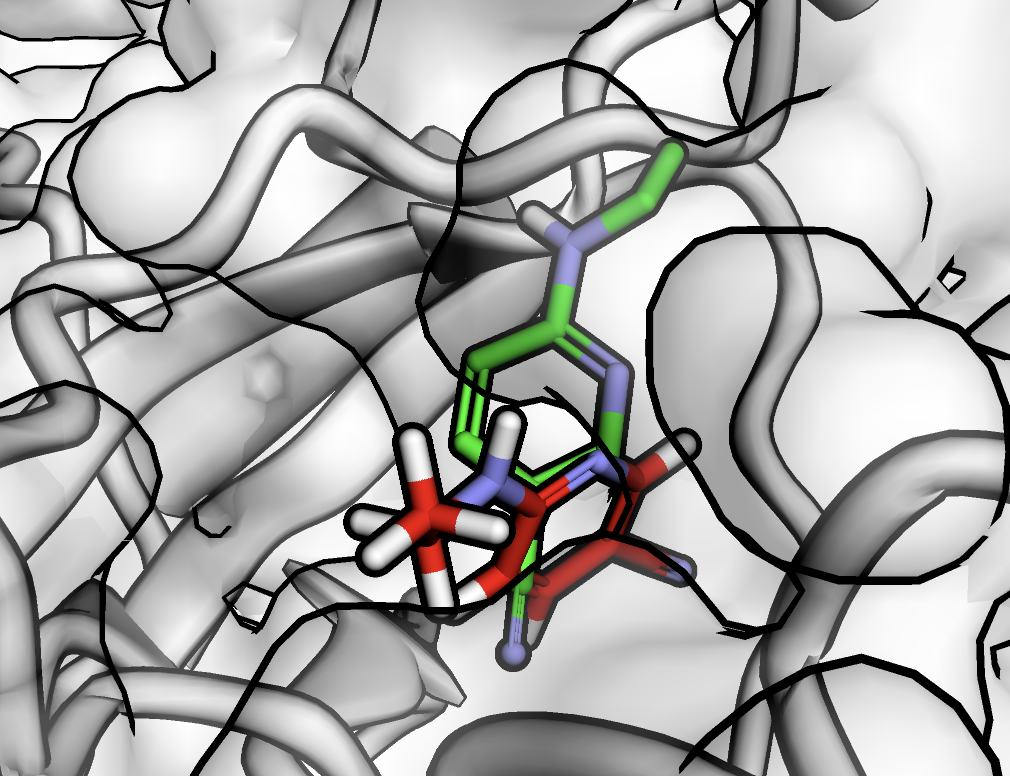

I hope you have enjoyed it !!